# Data Cleaning

### For this project we will gather Mount Rainier data on historical weather data and climbing statistics from Kaggle to clean for further use within the project.

Kaggle Link: https://www.kaggle.com/datasets/codersree/mount-rainier-weather-and-climbing-data

In [ ]:
# README Replace all "" with ''
# [] Move general comments on workflow to md

In [1]:
# Import packages
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data & Summarize

In [13]:
# import data as Pandas Dataframe
climbing_stats = pd.read_csv("../data/climbing_statistics.csv")
rainier_weather = pd.read_csv("../data/Rainier_Weather.csv")

# climbing statistics have been sourced from 
# weather data have been sourced from the Northwest Avalanche Center 'https://nwac.us'

# format date as datetime
climbing_stats["Date"] = pd.to_datetime(climbing_stats["Date"])
rainier_weather["Date"] = pd.to_datetime(rainier_weather["Date"])

In [14]:
# summarize datasets
climbing_stats.info()
rainier_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                4077 non-null   datetime64[ns]
 1   Route               4077 non-null   object        
 2   Attempted           4077 non-null   int64         
 3   Succeeded           4077 non-null   int64         
 4   Success Percentage  4077 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 159.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   464 non-null    datetime64[ns]
 1   Battery Voltage AVG    464 non-null    float64       
 2   Temperature AVG        464 non-null    float64       
 3   Relative Humidi

In [15]:
# merge the weather dataset to the climbing statistics dataset using a left outer join and remove rows with null weather data
data = pd.merge(climbing_stats,rainier_weather,how="left", on=["Date"])
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895 entries, 0 to 1897
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1895 non-null   datetime64[ns]
 1   Route                  1895 non-null   object        
 2   Attempted              1895 non-null   int64         
 3   Succeeded              1895 non-null   int64         
 4   Success Percentage     1895 non-null   float64       
 5   Battery Voltage AVG    1895 non-null   float64       
 6   Temperature AVG        1895 non-null   float64       
 7   Relative Humidity AVG  1895 non-null   float64       
 8   Wind Speed Daily AVG   1895 non-null   float64       
 9   Wind Direction AVG     1895 non-null   float64       
 10  Solare Radiation AVG   1895 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 177.7+ KB


## Review Data & Clean

In [16]:
# review the combined dataset
data

# things to note include:
# 1. Success Percentage is recorded as a percentage (%)
# 2. Temperature is recorded in Fahrenheit (F)
# 3. Wind Direction is recorded in clockwise degrees counting from the north (i.e., 0 degrees)
# 3. Of the weather statistics, we will only be interested in Temperature, Humidity, Wind Speed and Wind Direction


,Date,Route,Attempted,Succeeded,Success Percentage,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,2015-11-27,Disappointment Cleaver,2,0,0.0,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250
1,2015-11-21,Disappointment Cleaver,3,0,0.0,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417
2,2015-10-15,Disappointment Cleaver,2,0,0.0,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000
3,2015-10-13,Little Tahoma,8,0,0.0,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667
4,2015-10-09,Disappointment Cleaver,2,0,0.0,13.216250,38.260417,74.329167,65.138333,264.687500,27.791292
...,...,...,...,...,...,...,...,...,...,...,...
1893,2014-09-26,Disappointment Cleaver,3,0,0.0,13.532500,28.238333,100.000000,0.897625,259.645833,114.400833
1894,2014-09-25,Disappointment Cleaver,2,2,1.0,13.648333,26.823750,99.854167,3.166208,278.604167,142.698917
1895,2014-09-25,Disappointment Cleaver,12,6,0.5,13.648333,26.823750,99.854167,3.166208,278.604167,142.698917
1896,2014-09-24,Disappointment Cleaver,12,0,0.0,13.168750,29.702917,100.000000,45.915000,278.054167,37.873708


In [17]:
# remove the undesired columns from the dataset
clean_data = data.drop(columns=["Battery Voltage AVG", "Solare Radiation AVG"])
clean_data

,Date,Route,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG
0,2015-11-27,Disappointment Cleaver,2,0,0.0,26.321667,19.715000,27.839583,68.004167
1,2015-11-21,Disappointment Cleaver,3,0,0.0,31.300000,21.690708,2.245833,117.549667
2,2015-10-15,Disappointment Cleaver,2,0,0.0,46.447917,27.211250,17.163625,259.121375
3,2015-10-13,Little Tahoma,8,0,0.0,40.979583,28.335708,19.591167,279.779167
4,2015-10-09,Disappointment Cleaver,2,0,0.0,38.260417,74.329167,65.138333,264.687500
...,...,...,...,...,...,...,...,...,...
1893,2014-09-26,Disappointment Cleaver,3,0,0.0,28.238333,100.000000,0.897625,259.645833
1894,2014-09-25,Disappointment Cleaver,2,2,1.0,26.823750,99.854167,3.166208,278.604167
1895,2014-09-25,Disappointment Cleaver,12,6,0.5,26.823750,99.854167,3.166208,278.604167
1896,2014-09-24,Disappointment Cleaver,12,0,0.0,29.702917,100.000000,45.915000,278.054167


In [18]:
# review the summary statistics of the dataset
clean_data.describe()

# Upon analysis, the maximum value of Succeeded exceeds the maximum value of Attempter, which results in a maximum Success Percentage of >100%. Further analysis is required 

,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG
count,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000
mean,5.360422,2.616359,0.460795,40.711181,47.828637,10.503668,155.335106
std,3.906702,3.705221,0.559630,9.104555,22.154579,9.149581,91.106436
min,1.000000,0.000000,0.000000,6.834833,12.363500,0.000000,13.490000
25%,2.000000,0.000000,0.000000,33.376667,30.057083,4.453854,55.173375
50%,3.000000,2.000000,0.416667,40.049167,46.140417,7.395958,171.633375
75%,9.000000,4.000000,1.000000,48.628750,64.750833,14.657875,235.496667
max,12.000000,71.000000,14.200000,56.153750,100.000000,65.138333,280.383333


In [19]:
# Lookup the rows in which Succeeded > Attempted
clean_data.loc[clean_data["Succeeded"]>clean_data["Attempted"]]

# There are 6 instances in which the # of successful summmits exceeds the # of attempts for that day. 
# It may be the case that the successful summits were from attempts that began on previous days.
# As this cannot be confirmed, the rows will be dropped

,Date,Route,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG
133,2015-08-26,Disappointment Cleaver,3,4,1.333333,41.950833,54.233750,35.899167,22.134583
191,2015-08-21,Disappointment Cleaver,1,2,2.000000,43.208750,14.296333,19.141750,19.629583
507,2015-07-27,Emmons-Winthrop,3,4,1.333333,33.303333,52.500000,7.444625,191.560875
589,2015-07-20,Disappointment Cleaver,5,71,14.200000,49.154583,32.245250,8.580917,189.999167
1156,2015-06-23,Disappointment Cleaver,2,5,2.500000,38.033750,43.064583,5.631583,148.757292
1399,2015-06-12,Disappointment Cleaver,10,11,1.100000,39.889167,12.741125,14.657875,33.321667


In [20]:
# Drop the rows discussed above
clean_data = clean_data.drop(clean_data[clean_data["Succeeded"]>clean_data["Attempted"]].index)
clean_data.info()

# 6 rows successfully dropped from dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1889 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1889 non-null   datetime64[ns]
 1   Route                  1889 non-null   object        
 2   Attempted              1889 non-null   int64         
 3   Succeeded              1889 non-null   int64         
 4   Success Percentage     1889 non-null   float64       
 5   Temperature AVG        1889 non-null   float64       
 6   Relative Humidity AVG  1889 non-null   float64       
 7   Wind Speed Daily AVG   1889 non-null   float64       
 8   Wind Direction AVG     1889 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 147.6+ KB


In [21]:
# Review list of routes
clean_data[["Route", "Attempted", "Succeeded"]].groupby("Route").sum().reset_index(drop=True)

# There are two instances of Fuhrer Finger (Fuhrers Finger and Fuhrer's Finger)
# There seem to also be spelling mistakes (e.g., RIngraham and Directge)

# There are also a few attempts made on "Unknown" route that can be removed

# Upon further inspection "Glacier Only - No Summit Attempt" has 13 successful summit
# The title suggests that no summits attempted, therefore the successes recorded may not be true summits of the mountain (but rather the glacier)
# As such, this route will also be removed

,Attempted,Succeeded
0,4,2
1,7487,3647
2,1462,787
3,14,4
4,76,9
5,3,0
6,80,11
7,99,7
8,17,6
9,523,267


In [22]:
# Replace the apostrophe with nothing to make both Fuhrers Finger route names the same
clean_data["Route"] = clean_data["Route"].str.replace("'","")
clean_data["Route"] = clean_data["Route"].str.replace("RIngraham Directge","Ingraham Direct")
clean_data = clean_data.drop(clean_data[clean_data["Route"]=="Unknown"].index)
clean_data = clean_data.drop(clean_data[clean_data["Route"]=="glacier only - no summit attempt"].index)
clean_data[["Route", "Attempted", "Succeeded"]].groupby("Route").sum().reset_index(drop=True)

,Attempted,Succeeded
0,4,2
1,7487,3647
2,1462,787
3,90,13
4,3,0
5,80,11
6,99,7
7,17,6
8,523,267
9,73,32


## High-Level Exploratory Data Analysis (EDA)
A brief analysis to get a better understanding of the data. A more detailed analysis has been performed in the mt_rainier_eda.ipynb notebook.

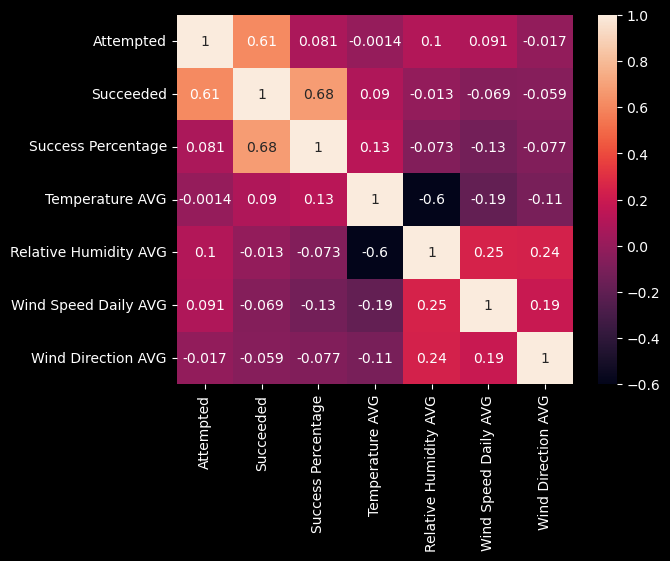

In [23]:
# Explore the correlations within the dataset
sns.heatmap(clean_data.corr(), annot = True)

plt.rcParams['figure.figsize'] = (20, 7)

<AxesSubplot:>

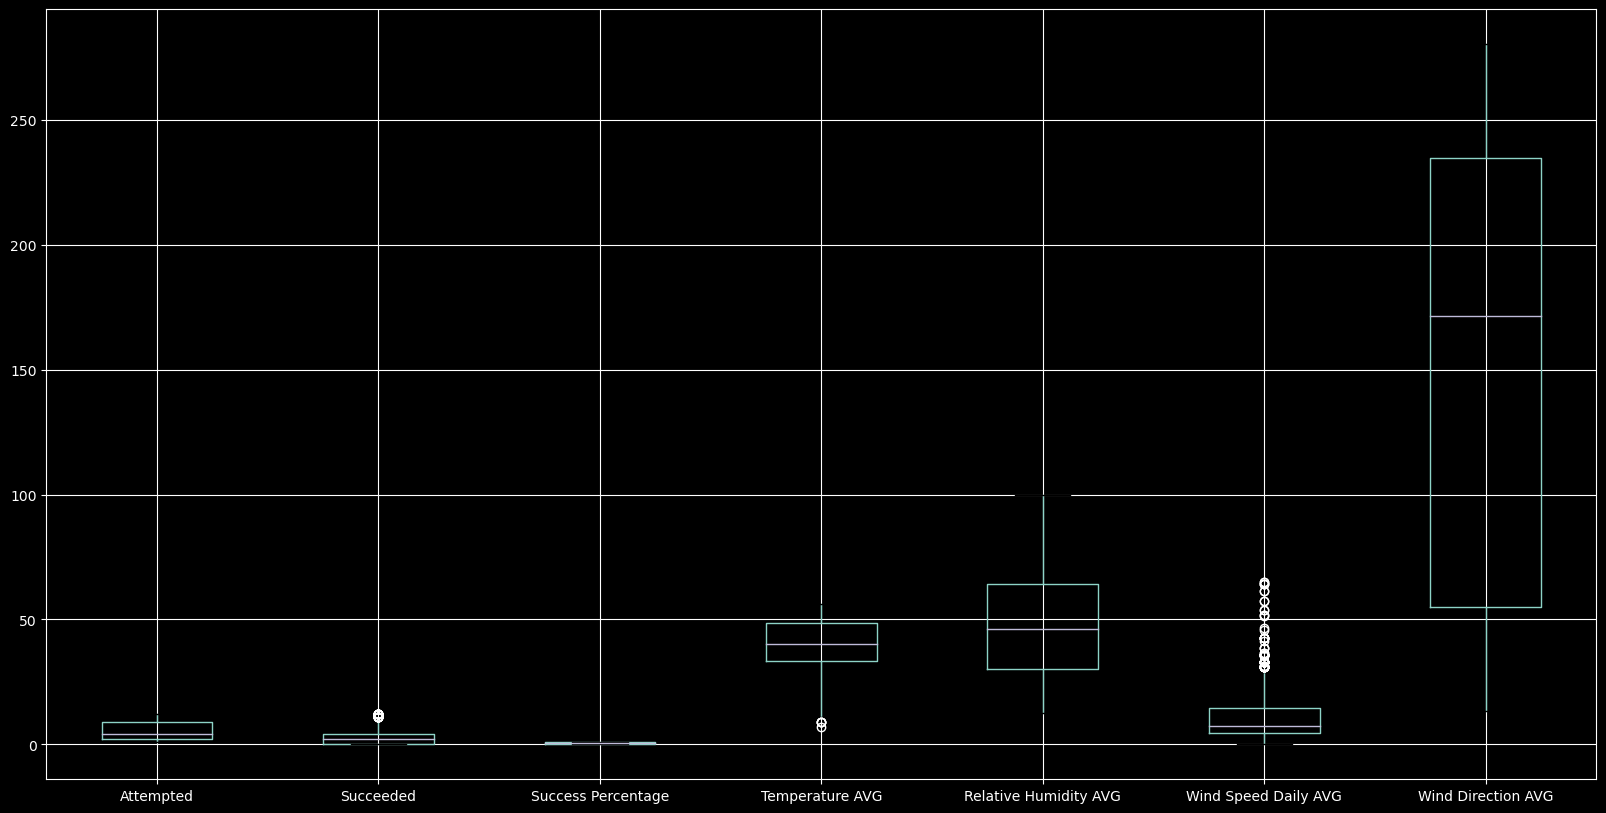

In [24]:
# Generate Box-Plot to identify outliers and data skewing
clean_data.boxplot(figsize=(20,10))

# The outliers noted will not be dealt with at this time as the the clean_data will be used for visualization and not statistical analysis
# Refer to the model notebook for treatment of the outliers

In [27]:
# Export cleaned data for further Exploratory Data Analysis & Visualization
# Refer to data_eda notebook
filepath = "../data/clean_data.csv"
clean_data.to_csv(filepath)

In [28]:
clean_data.info()

,Date,Route,Attempted,Succeeded,Success Percentage,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG
0,2015-11-27,Disappointment Cleaver,2,0,0.0,26.321667,19.715000,27.839583,68.004167
1,2015-11-21,Disappointment Cleaver,3,0,0.0,31.300000,21.690708,2.245833,117.549667
2,2015-10-15,Disappointment Cleaver,2,0,0.0,46.447917,27.211250,17.163625,259.121375
3,2015-10-13,Little Tahoma,8,0,0.0,40.979583,28.335708,19.591167,279.779167
4,2015-10-09,Disappointment Cleaver,2,0,0.0,38.260417,74.329167,65.138333,264.687500
...,...,...,...,...,...,...,...,...,...
1893,2014-09-26,Disappointment Cleaver,3,0,0.0,28.238333,100.000000,0.897625,259.645833
1894,2014-09-25,Disappointment Cleaver,2,2,1.0,26.823750,99.854167,3.166208,278.604167
1895,2014-09-25,Disappointment Cleaver,12,6,0.5,26.823750,99.854167,3.166208,278.604167
1896,2014-09-24,Disappointment Cleaver,12,0,0.0,29.702917,100.000000,45.915000,278.054167
